In [2]:
import pandas as pd
import numpy as np

### Data Cleaning , Preprocessing

In [ ]:
import re

df=pd.read_csv('Restaurant.csv')
df1=pd.read_csv('Restaurant Names.csv')
 
df.rename(columns={'Restaurant':'Restaurant Name'},inplace=True)
df1.rename(columns={'Name':'Restaurant Name'},inplace=True)
 
!pip install transliterate
!pip install indic-transliteration
 
df = pd.merge(df, df1, on='Restaurant Name', how='left')
df.rename(columns={'Review':'Reviews'},inplace=True)
 
from indic_transliteration import sanscript
 
def hindi_to_english(hindi_text):
    english_text = sanscript.transliterate(hindi_text, sanscript.HK, sanscript.ITRANS)
    return english_text
 
def hindi_to_english(hindi_text):
    if isinstance(hindi_text, str):
        english_text = sanscript.transliterate(hindi_text, sanscript.HK, sanscript.ITRANS)
        return english_text
    else:
        return hindi_text
 
df['Reviewer'] =df['Reviewer'].apply(hindi_to_english)
df.drop_duplicates(inplace=True,keep= False)
df[['No_of_Reviews', 'No_of_Followers']] = df['Metadata'].str.extractall('(\d+)').unstack()

df['Pictures'] = pd.to_numeric(df['Pictures'], errors='coerce').astype('Int64')
 
from datetime import datetime, timedelta
df['No_of_Reviews'] = pd.to_numeric(df['No_of_Reviews'], errors='coerce').astype('Int64')
df['No_of_Followers'] = pd.to_numeric(df['No_of_Followers'], errors='coerce').astype('Int64')
 
df["Rating"] = df["Rating"].replace('Like', 4)
df["Rating"] =df['Rating'].astype("float")
df.dropna(subset =['Reviews'], inplace = True)
df['No_of_Followers'].fillna(0,inplace = True)

df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = pd.DatetimeIndex(df['Time']).hour
df['Year'] = pd.DatetimeIndex(df['Time']).year
 
df.to_csv('Final Combined Dataset.csv', index=False)

In [3]:
df=pd.read_csv('Final_Combined_DataSet.csv')

In [4]:
df.drop(columns=['Links','Hour','Year'],axis=1,inplace=True)

In [5]:
df.head(30)

,Unnamed: 0,Restaurant Name,Reviewer,Reviews,Rating,Time,Pictures,Cost,Collections,Cuisines,Timings,No_of_Reviews,No_of_Followers,Sentiment,Status_1
0,0,Beyond Flavours,Rusha Chakraborty,The ambience was good food was quite good had...,5.0,2019-05-25 15:54:00,0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,2,0.9664,Positive
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening Se...,5.0,2019-05-25 14:20:00,0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",3,2,0.9360,Positive
2,2,Beyond Flavours,Ashok Shekhawat,A must try great food great ambience Thnx for ...,5.0,2019-05-24 22:54:00,0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",2,3,0.9186,Positive
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy Only becau...,5.0,2019-05-24 22:11:00,0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,0.8591,Positive
4,4,Beyond Flavours,Dileep,Food is goodwe ordered Kodi drumsticks and bas...,5.0,2019-05-24 21:37:00,0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",3,2,0.9201,Positive
5,5,Beyond Flavours,Nagabhavani K,Ambiance is good service is good food is aPrad...,5.0,2019-05-24 15:22:00,0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,0,0.9565,Positive
6,6,Beyond Flavours,Jamuna Bhuwalka,Its a very nice place ambience is different al...,5.0,2019-05-24 01:02:00,0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,0,0.7264,Positive
7,7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4.0,2019-05-23 15:01:00,0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,0,0.3669,Positive
8,8,Beyond Flavours,Akash Thorat,Excellent food specially if you like spicy fo...,5.0,2019-05-22 23:12:00,0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,0.9638,Positive
9,9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend ...,5.0,2019-05-22 22:37:00,0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,0.9831,Positive


In [6]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SriramM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SriramM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SriramM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [27]:
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SriramM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load stopwords list once outside the function
stopwords_list = set(stopwords.words('english'))

def preprocess_text(text, stopwords_list):
    if pd.isnull(text):  # Check if the value is NaN
        return []
    
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords_list]
    
    return tokens

# Assuming 'Reviews' is the correct column name, replace it with the actual column name if different
df['Tokens'] = df['Reviews'].apply(preprocess_text, stopwords_list=stopwords_list)


In [11]:
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Reviews'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

In [12]:

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    
    # Check for NaN values
    if pd.isnull(text):
        return ''
    
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'Reviews' column
df['Transformed Reviews'] = df['Reviews'].apply(remove_stopwords)



In [13]:
def adjusted_sent(df):
    if df['Sentiment'] == 0:
        if df['Rating'] > 3:
            return 'Positive'
        elif df['Rating'] == 3:
            return 'Neutral'
        else:
            return 'Negative'
    elif -0.2 < df['Sentiment'] < 0:
        if df['Rating'] > 3:
            return 'Positive'
        elif df['Rating'] == 3:
            return 'Neutral'
        else:
            return 'Negative'
    elif df['Sentiment'] <= -0.2:
        if df['Rating'] > 4:
            return 'Positive'
        elif 3 <= df['Rating'] <= 4:
            return 'Neutral'
        else:
            return 'Negative'
    elif 0 < df['Sentiment'] < 0.5:
        if df['Rating'] >= 4:
            return 'Positive'
        elif 3 <= df['Rating'] < 4:
            return 'Neutral'
        else:
            return 'Negative'
    else:
        if df['Rating'] >= 4:
            return 'Positive'
        elif 3 <= df['Rating'] < 4:
            return 'Neutral'
        else:
            return 'Negative'

# Apply the adjusted_sent function to create the 'Status_1' column
df['Status_1'] = df.apply(adjusted_sent, axis=1)


In [16]:
df['Status_1'] = df.apply(adjusted_sent,axis = 1)

In [15]:
df.dtypes

Unnamed: 0               int64
Restaurant Name         object
Reviewer                object
Reviews                 object
Rating                 float64
Time                    object
Pictures                 int64
Cost                    object
Collections             object
Cuisines                object
Timings                 object
No_of_Reviews            int64
No_of_Followers          int64
Sentiment              float64
Status_1                object
Tokens                  object
Transformed Reviews     object
dtype: object

In [17]:
df['Reviews'][8059]

'Ordered Chicken tikha  chicken tandoori biryani  food very oily also requested for less masala still they did not take note I think restaurant guys are very interested in making money than quality Delivery was quick and good  for zomato delivery'

In [18]:
df.iloc[8059]

Unnamed: 0                                                          8059
Restaurant Name                                      Tandoori Food Works
Reviewer                                                            Hari
Reviews                Ordered Chicken tikha  chicken tandoori biryan...
Rating                                                               1.0
Time                                                 2018-08-25 11:45:00
Pictures                                                               0
Cost                                                                 500
Collections                                           Brilliant Biryanis
Cuisines                                     North Indian, Burger, Kebab
Timings                12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)...
No_of_Reviews                                                          1
No_of_Followers                                                        0
Sentiment                                          

In [19]:
df.to_csv('Final_Combined_Dataset.csv')

In [20]:
avg_ratings = df.groupby('Restaurant Name')['Rating'].mean().sort_values(ascending=False)


In [21]:
top_restaurants = avg_ratings.head(10)


In [22]:
top_restaurants

Restaurant Name
AB's - Absolute Barbecues                  4.88
B-Dubs                                     4.81
3B's - Buddies, Bar & Barbecue             4.76
Paradise                                   4.70
Flechazo                                   4.66
The Indi Grill                             4.60
Zega - Sheraton Hyderabad Hotel            4.45
Over The Moon Brew Company                 4.34
Beyond Flavours                            4.28
Cascade - Radisson Hyderabad Hitec City    4.26
Name: Rating, dtype: float64

In [23]:
selected_df = df[df['Restaurant Name'].isin(top_restaurants)]


In [24]:
text = ' '.join(selected_df['Transformed Reviews'])


In [32]:
Avg_ratings = df.groupby('Restaurant Name')['Rating'].mean().sort_values()


In [33]:
lowest_restaurants = Avg_ratings.head(10)


In [34]:
lowest_restaurants 

Restaurant Name
Hotel Zara Hi-Fi                         2.400
Asian Meal Box                           2.580
Pakwaan Grand                            2.710
Mathura Vilas                            2.820
Behrouz Biryani                          2.825
Shree Santosh Dhaba Family Restaurant    2.830
The Chocolate Room                       2.830
KFC                                      2.850
Club Rogue                               2.880
Desi Bytes                               2.900
Name: Rating, dtype: float64

In [35]:
lowest_df = df[df['Restaurant Name'].isin(lowest_restaurants)]


In [36]:
text = ' '.join(lowest_df['Transformed Reviews'])


In [40]:
top_10_highest = avg_ratings.tail(10)
top_10_lowest = avg_ratings.head(10)

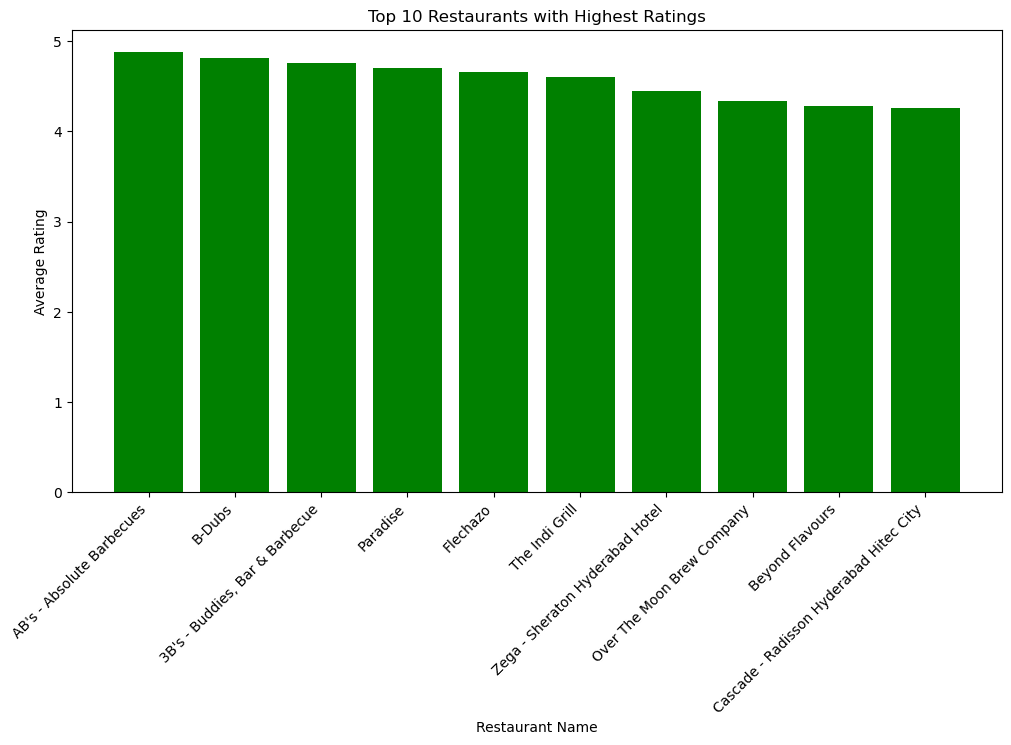

In [41]:
plt.figure(figsize=(12, 6))
plt.bar(top_restaurants.index, top_restaurants.values, color='green')  # Reverse the order
plt.title('Top 10 Restaurants with Highest Ratings')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

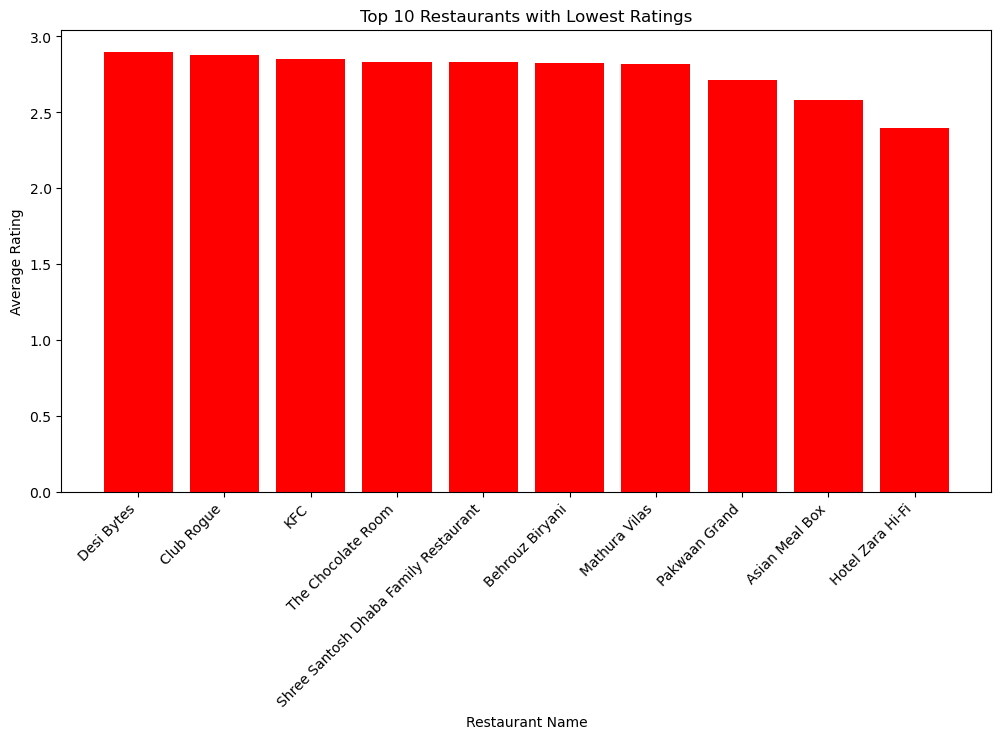

In [42]:
plt.figure(figsize=(12, 6))
plt.bar(lowest_restaurants.index[::-1], lowest_restaurants.values[::-1], color='red')
plt.title('Top 10 Restaurants with Lowest Ratings')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [43]:
top_reviewers = df.sort_values(by=['No_of_Followers', 'No_of_Reviews'], ascending=False).head(10)


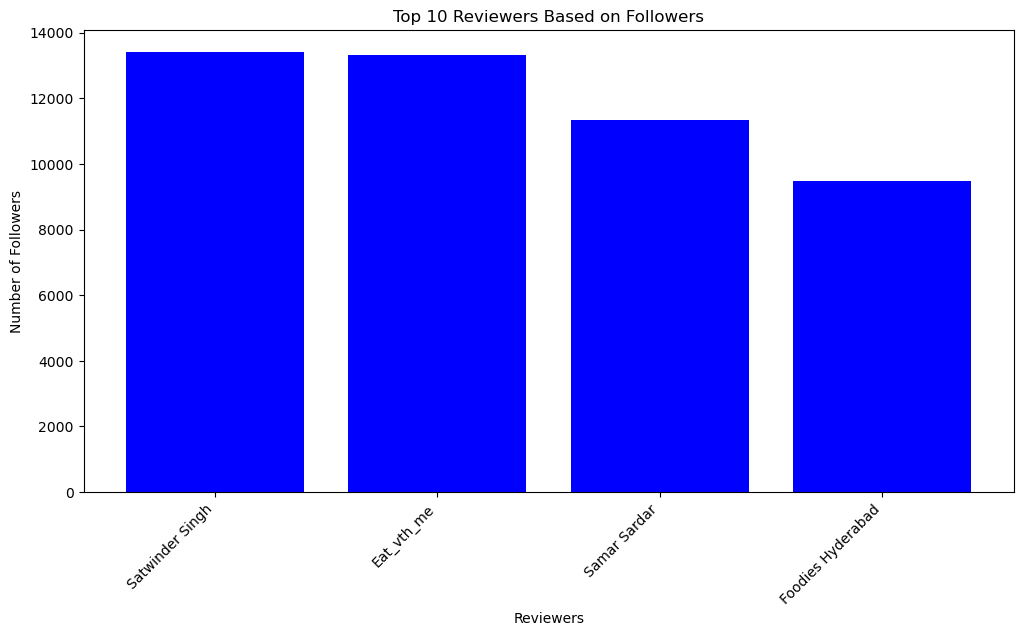

In [150]:
plt.figure(figsize=(12, 6))
plt.bar(top_reviewers['Reviewer'], top_reviewers['No_of_Followers'], color='blue')
plt.title('Top 10 Reviewers Based on Followers')
plt.xlabel('Reviewers')
plt.ylabel('Number of Followers')
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
df.sample()

,Unnamed: 0,Restaurant Name,Reviewer,Reviews,Rating,Time,Pictures,Cost,Collections,Cuisines,Timings,No_of_Reviews,No_of_Followers,Sentiment,Status_1
5564,5564,Cafe Eclat,Abhimanyu Padmaraj,A must visit cafe with an amazing range of cak...,5.0,2018-08-19 00:11:00,3,700,Sneak Peek Hyderabad,"Cafe, Bakery",8 AM to 11:30 PM,81,248,0.8807,Positive


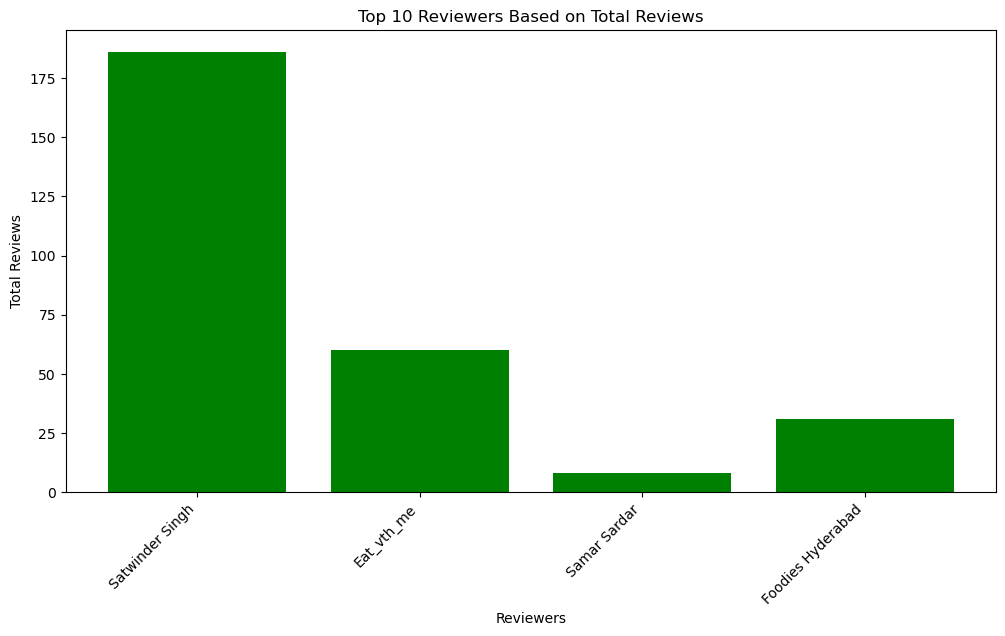

In [152]:
plt.figure(figsize=(12, 6))
plt.bar(top_reviewers['Reviewer'], top_reviewers['No_of_Reviews'], color='green')
plt.title('Top 10 Reviewers Based on Total Reviews')
plt.xlabel('Reviewers')
plt.ylabel('Total Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

In [154]:
top_reviewers_followers = df.sort_values(by='No_of_Followers', ascending=False).head(10)


In [157]:
top_reviewers_followers = df.groupby('Reviewer')['No_of_Followers'].sum().reset_index()


In [158]:
top_reviewers_followers

,Reviewer,No_of_Followers
0,Sonu,156
1,#FOODPORN,5873
2,#chloesviews // CAH,1
3,$ign,55
4,4mybanti,4
...,...,...
7436,चौदरी मल्लमपाटी,2
7437,দেবাশিষ মুখার্জি,0
7438,প্রমিলা মুখার্জি,1
7439,ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ,30


In [163]:
top_reviewers_reviews = df.groupby('Reviewer')['No_of_Reviews'].sum().reset_index()


In [187]:
top_reviewers_reviews = df.sort_values(by='No_of_Reviews', ascending=False).head(25)


In [188]:
top_reviewers_followers = df.sort_values(by='No_of_Followers', ascending=False).head(25)


In [189]:
top_reviewers_reviews

,Unnamed: 0,Restaurant Name,Reviewer,Reviews,Rating,Time,Pictures,Links,Cost,Collections,Cuisines,Timings,No_of_Reviews,No_of_Followers,Hour,Year,Sentiment,Status_1
3123,3123,Pista House,Anvesh Chowdary,Tried the zafrani biryani and then butter chi...,4.0,2019-02-14 22:23:00,0,https://www.zomato.com/hyderabad/pista-house-2...,"1,000",Haleem,"Bakery, North Indian, Mughlai, Juices, Chinese",11 AM to 12 Midnight,1031,1654,22,2019,0.6369,Positive
7293,7293,Labonel,Anvesh Chowdary,This place stays in the best bakeries in the ...,4.0,2016-10-27 00:42:00,0,https://www.zomato.com/hyderabad/labonel-gachi...,"1,000",Best Bakeries,"Bakery, Desserts","11 AM to 8 PM (Mon-Sat), Sun Closed",1031,1654,0,2016,0.6971,Positive
9163,9163,Collage - Hyatt Hyderabad Gachibowli,Anvesh Chowdary,I dont expect how people are maintaining the p...,2.0,2019-04-04 22:37:00,0,https://www.zomato.com/hyderabad/collage-hyatt...,"2,800",Sunday Brunches,"Continental, Italian, North Indian, Chinese, A...",24 Hours (Mon-Sun),1031,1654,22,2019,0.2732,Negative
4511,4511,Owm Nom Nom,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,The waiters are super slow the cutlery used in...,2.0,2019-03-31 13:06:00,0,https://www.zomato.com/hyderabad/owm-nom-nom-g...,900,NaN,"Chinese, Biryani, Andhra, North Indian",12Noon to 11:30PM (Mon-Sun),685,794,13,2019,0.9120,Negative
7634,7634,The Old Madras Baking Company,Abc098,The brekkies are served with some lovely soft ...,3.0,2018-11-25 14:44:00,0,https://www.zomato.com/hyderabad/the-old-madra...,350,NaN,Bakery,7 AM to 11 PM,665,2275,14,2018,0.7717,Neutral
6623,6623,Aromas@11SIX,Mithun Ravindranathan,Review No In my recent visit to Hyderabad I ...,4.0,2018-12-11 00:00:00,0,https://www.zomato.com/hyderabad/aromas11six-g...,750,NaN,"North Indian, Chinese, Mughlai, Biryani",11:30 AM to 12 Midnight,560,2863,0,2018,0.9967,Positive
9608,9608,Hyderabadi Daawat,Mohd Zubair Ali (Hyderabad.Food.Diaries),I am a huge fan of regional cuisines The diver...,4.0,2018-12-13 14:53:00,0,https://www.zomato.com/hyderabad/hyderabadi-da...,600,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai",12:30pm to 11:30pm (Mon-Sun),482,1688,14,2018,0.9774,Positive
9954,9954,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,2016-05-31 16:41:00,6,https://www.zomato.com/hyderabad/chinese-pavil...,"1,000",NaN,"Chinese, Seafood","12 Noon to 3:30 PM, 7 PM to 11 PM",472,1302,16,2016,0.7650,Neutral
9123,9123,Cascade - Radisson Hyderabad Hitec City,Epicurean Tales,I was staying at the Hotel Radisson and so got...,4.0,2018-06-27 10:55:00,24,https://www.zomato.com/hyderabad/cascade-radis...,"1,800",NaN,"North Indian, Italian, Continental, Asian",24 Hours,452,2464,10,2018,0.9010,Positive
5887,5887,Tempteys,Epicurean Tales,This place is located close to the Hotel Radis...,4.0,2018-06-27 09:10:00,7,https://www.zomato.com/hyderabad/tempteys-gach...,350,Best Milkshakes,"Desserts, Beverages",11:30 AM to 1 AM,452,2464,9,2018,0.9721,Positive


In [183]:
top_reviewers_followers

,Unnamed: 0,Restaurant Name,Reviewer,Reviews,Rating,Time,Pictures,Links,Cost,Collections,Cuisines,Timings,No_of_Reviews,No_of_Followers,Hour,Year,Sentiment,Status_1
6588,6588,Komatose - Holiday Inn Express & Suites,Satwinder Singh,Well next to Jonathans Kitchen is this place t...,5.0,2018-04-09 16:11:00,5,https://www.zomato.com/hyderabad/komatose-holi...,"1,500","Happy Hours, Top-Rated, Gold Curated","North Indian, Chinese, Japanese, Sushi",1 PM to 11 PM,186,13410,16,2018,0.8805,Positive
3926,3926,Deli 9 Bistro,Satwinder Singh,Nice ambience wonderful service but not so won...,2.0,2019-02-10 12:46:00,4,https://www.zomato.com/hyderabad/deli-9-bistro...,700,NaN,"Cafe, Continental, Desserts",12 Noon to 10:30 PM,186,13410,12,2019,0.7856,Negative
6872,6872,The Tilt Bar Republic,Satwinder Singh,Nice place thisExcellent choice in Beers proba...,4.0,2018-11-15 11:54:00,3,https://www.zomato.com/thetiltbarrepublic,"1,500","Gigs and Events, Corporate Favorites","North Indian, Continental, Italian",12noon to 12midnight (Mon-Sun),186,13410,11,2018,0.7906,Positive
8713,8713,American Wild Wings,Eat_vth_me,Follow my insta EatvthmeI have been to this p...,5.0,2019-05-13 15:32:00,25,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,60,13320,15,2019,0.9956,Positive
5159,5159,Hitech Bawarchi Food Zone,Samar Sardar,Went there for team lunch last week From the o...,3.0,2018-08-29 01:01:00,0,https://www.zomato.com/hyderabad/hitech-bawarc...,500,NaN,"Biryani, North Indian, Chinese",12 Noon to 11 PM,8,11329,1,2018,0.7506,Neutral
3146,3146,Pista House,Samar Sardar,Had a nice evening there yesterday Food was de...,4.0,2018-10-12 20:21:00,6,https://www.zomato.com/hyderabad/pista-house-2...,"1,000",Haleem,"Bakery, North Indian, Mughlai, Juices, Chinese",11 AM to 12 Midnight,8,11329,20,2018,0.9418,Positive
8022,8022,Tandoori Food Works,Foodies Hyderabad,I order for tandoori chicken and chicken birya...,4.0,2019-01-12 15:49:00,0,https://www.zomato.com/hyderabad/tandoori-food...,500,Brilliant Biryanis,"North Indian, Burger, Kebab","12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)...",31,9494,15,2019,0.8658,Positive
7880,7880,Khaan Saab,Foodies Hyderabad,I visited with my friends on last MondayI enjo...,5.0,2019-02-01 18:04:00,0,https://www.zomato.com/hyderabad/khaan-saab-ga...,"1,100",New on Gold,"North Indian, Mughlai","12 Noon to 3:30 PM, 7 PM to 11:30 PM",31,9494,18,2019,0.9491,Positive
9614,9614,Hyderabadi Daawat,Foodies Hyderabad,The place was in the list when my friends told...,5.0,2018-12-02 16:35:00,1,https://www.zomato.com/hyderabad/hyderabadi-da...,600,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai",12:30pm to 11:30pm (Mon-Sun),31,9494,16,2018,0.9313,Positive
9473,9473,Desi Bytes,Foodies Hyderabad,I have ordered chicken hakka noodlechilli pane...,4.0,2018-09-21 19:53:00,2,https://www.zomato.com/hyderabad/desi-bytes-ga...,400,NaN,"North Indian, Chinese","1 PM to 2 AM (Mon, Wed-Sun), Tue Closed",31,9494,19,2018,0.4144,Positive


In [206]:
filtered_df = df[df['Reviewer'] != '#FOODPORN']

top_reviewers_reviews = filtered_df[['Reviewer', 'No_of_Reviews']].drop_duplicates().nlargest(10, 'No_of_Reviews')


In [204]:
top_reviewers_followers 

,Reviewer,No_of_Followers
3926,Satwinder Singh,13410
8713,Eat_vth_me,13320
3146,Samar Sardar,11329
7880,Foodies Hyderabad,9494
1177,Srinivas,7628
1071,Aman Arora,7589
635,ASH&B2,6931
5580,Hasanthi Mula,5879
4819,FooD HUNTer,5715
1218,Food Nawabs,5533


In [207]:
top_reviewers_reviews

,Reviewer,No_of_Reviews
3123,Anvesh Chowdary,1031
4511,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685
7634,Abc098,665
6623,Mithun Ravindranathan,560
9608,Mohd Zubair Ali (Hyderabad.Food.Diaries),482
9954,Bhargava Krishna,472
5887,Epicurean Tales,452
755,Raghu,443
9134,Aarti Kamath,417
9136,Shrishail Deshnur,414


In [165]:
top_reviewers_reviews

,Reviewer,No_of_Reviews
772,Anvesh Chowdary,3093
4394,Raghu,2658
3856,Parijat Ray,1898
5237,Sambhangi Sandeep,1638
1952,Gourmet Hunter,1617
1020,Avin Seth,1576
5782,Shravya Gunipudi,1544
4253,Priyambada Choudhury,1376
5785,Shreshth Malhotra,1375
1721,Epicurean Tales,1356


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Anvesh Chowdary'),
  Text(1, 0, 'ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ'),
  Text(2, 0, 'Abc098'),
  Text(3, 0, 'Mithun Ravindranathan'),
  Text(4, 0, 'Mohd Zubair Ali (Hyderabad.Food.Diaries)'),
  Text(5, 0, 'Bhargava Krishna'),
  Text(6, 0, 'Epicurean Tales'),
  Text(7, 0, 'Raghu'),
  Text(8, 0, 'Aarti Kamath'),
  Text(9, 0, 'Shrishail Deshnur')])

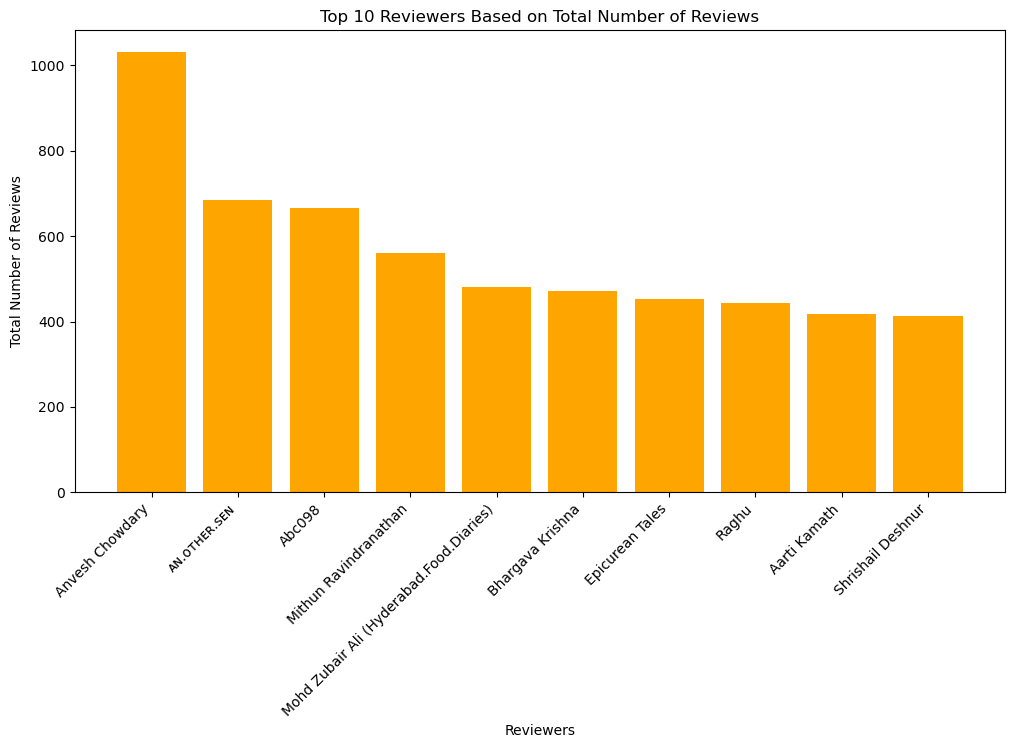

In [208]:
plt.figure(figsize=(12, 6))
plt.bar(top_reviewers_reviews['Reviewer'], top_reviewers_reviews['No_of_Reviews'], color='orange')
plt.title('Top 10 Reviewers Based on Total Number of Reviews')
plt.xlabel('Reviewers')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45, ha='right')

In [168]:
top_reviewers_followers = df.groupby('Reviewer')['No_of_Followers'].sum().reset_index()



In [169]:
top_reviewers_followers = top_reviewers_followers.sort_values(by='No_of_Followers', ascending=False).head(10)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Satwinder Singh'),
  Text(1, 0, 'Eat_vth_me'),
  Text(2, 0, 'Samar Sardar'),
  Text(3, 0, 'Foodies Hyderabad'),
  Text(4, 0, 'Srinivas'),
  Text(5, 0, 'Aman Arora'),
  Text(6, 0, 'ASH&B2'),
  Text(7, 0, 'Hasanthi Mula'),
  Text(8, 0, 'FooD HUNTer'),
  Text(9, 0, 'Food Nawabs')])

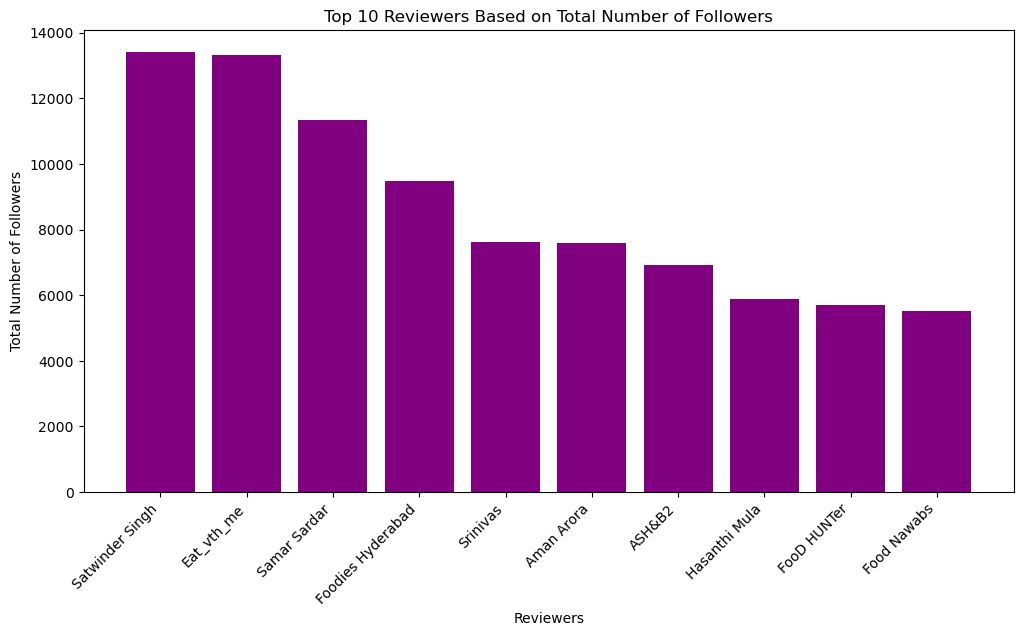

In [209]:
plt.figure(figsize=(12, 6))
bars = plt.bar(top_reviewers_followers['Reviewer'], top_reviewers_followers['No_of_Followers'], color='purple')
plt.title('Top 10 Reviewers Based on Total Number of Followers')
plt.xlabel('Reviewers')
plt.ylabel('Total Number of Followers')
plt.xticks(rotation=45, ha='right')

In [140]:
sp=pddf.sample(30)

In [174]:
pddf.iloc[9952]['Review']

'Bad rating is mainly bechause of "Chichken Bone found in Veg food" and is not achcheptable for a Vegetarian.\n\nTo satiate Cravings for Chinese food we headed to Chinese Pavilion and there was also a vouCher available in Little app for LunCheon tray for RRis 310 (Veg) [well do not bother for the vouCher as the priche for Veg LunCheon tray is RRis 275/- + taxes in the restaurant itself).\n\nThe ambianche is dechent and sinche it was noon, not many tables ochchupied so it was pretty quite.\n\nIt was Thrusday spechial (Veg):\nHot and Shour soup: was just OK - well it had sprouts whiCh were chrunChy in your mouth: something different.\nKimChi - salad (personally i.am never fond of it)\nPotato in plum sauche - this was very good and well made\nBrocholli, Baby chorn, Mushroom in spichy sauche - this dish lived to its name .atoo spichy.a; but was fine with fried riche\nVeg hakka noodles - was good\nVeg fried riche\n\nOverall the food tasted good until a pieche of Chichken BONE chame into my 

In [141]:
sp

,Unnamed: 0,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Cuisines,Timings,TotalReviews,Followers,Hour,Year,transformed_reviews,sentiment,compound_score
2215,2215,B-Dubs,~Naneshporika59,Came to bdubs for the IPL final and we really ...,5.0,1 Review,2019-05-12 22:53:00,0,https://www.zomato.com/hyderabad/b-dubs-gachib...,1600,American,"11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11a...",1,0,22,2019,came bdubs ipl final really felt like stadium ...,postive,0.9095
5464,5464,Asian Meal Box,Akhil Shai,too late delivered,2.0,"2 Reviews , 5 Followers",2018-10-20 00:13:00,0,https://www.zomato.com/hyderabad/asian-meal-bo...,200,Asian,"12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)...",2,5,0,2018,late delivered,Neutral,0.0000
5870,5870,Tempteys,~Nowri Prasanth Chaduvula,"Extraordinary , fantastich , marvellous .........",5.0,"4 Reviews , 1 Follower",2018-07-12 20:48:00,0,https://www.zomato.com/hyderabad/tempteys-gach...,350,"Desserts, Beverages",11:30 AM to 1 AM,4,1,20,2018,extraordinary fantastich marvellous best sh...,postive,0.9169
6211,6211,Shree Santosh Dhaba Family Restaurant,Nillu,"I always prefer this restaurant for veg , sinc...",4.0,"17 Reviews , 9 Followers",2019-02-11 00:07:00,0,https://www.zomato.com/hyderabad/shree-santosh...,500,"North Indian, Chinese, Fast Food",11 AM to 11:30 PM,17,9,0,2019,always prefer restaurant veg sinche near room...,postive,0.7845
7377,7377,Driven Cafe,Pushyami RRieddy,A best plache for some hot Chocholate and quic...,4.0,"29 Reviews , 132 Followers",2018-05-25 07:42:00,3,https://www.zomato.com/hyderabad/driven-cafe-g...,600,"Cafe, Fast Food, Beverages",4 AM to 12 Midnight,29,132,7,2018,best plache hot chocholate quichk hunger bites...,postive,0.9169
3941,3941,Deli 9 Bistro,Kalpit Shhah,"We were not that hungry, so we ordered veggie ...",5.0,"12 Reviews , 9 Followers",2019-01-13 13:07:00,0,https://www.zomato.com/hyderabad/deli-9-bistro...,700,"Cafe, Continental, Desserts",12 Noon to 10:30 PM,12,9,13,2019,hungry ordered veggie 9 burger veg shawarma w...,postive,0.7269
6349,6349,Dine O China,~Nourmet Hunter,We ordered simple non-veg dishes and liked the...,4.0,"231 Reviews , 407 Followers",2018-08-17 12:44:00,5,https://www.zomato.com/hyderabad/dine-o-china-...,850,"Chinese, Asian, Momos",11:30AM to 11PM (Mon-Sun),231,407,12,2018,ordered simple nonveg dishes liked flavours ad...,postive,0.9403
3022,3022,Pot Pourri,The Other Foodie,While schrolling through the 1+1 on food offer...,4.0,"22 Reviews , 90 Followers",2019-04-18 12:26:00,4,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,"Andhra, South Indian, North Indian",11 AM to 11 PM,22,90,12,2019,schrolling 11 food offer options zomato gold ...,postive,0.2500
1026,1026,Sardarji's Chaats & More,~Nondi Kavinder RRieddy,Went two three times after that dechided to gi...,5.0,"28 Reviews , 64 Followers",2019-03-01 17:04:00,0,https://www.zomato.com/hyderabad/sardarjis-cha...,400,"Street Food, North Indian, Fast Food","12 Noon to 3:30 PM, 7 PM to 10:30 PM",28,64,17,2019,went two three times dechided give rating 5 ev...,postive,0.6597
2024,2024,13 Dhaba,Shunita Mandal,Awesome kulCha with kaali dal & raita.\nPaneer...,4.0,"11 Reviews , 22 Followers",2019-02-09 20:14:00,0,https://www.zomato.com/hyderabad/13-dhaba-gach...,450,North Indian,"12:30 PM to 10 PM (Tue-Sun), Mon Closed",11,22,20,2019,awesome kulcha kaali dal raita paneer chombo...,postive,0.9169


In [120]:
sp

,Unnamed: 0,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Cuisines,Timings,TotalReviews,Followers,Hour,Year,transformed_reviews,sentiment,compound_score
4407,4407,La La Land - Bar & Kitchen,Digvijay Shingh,Sho now this has left me with no option but to...,1.0,"5 Reviews , 32 Followers",2019-04-27 19:57:00,0,https://www.zomato.com/hyderabad/la-la-land-ba...,1000,"Finger Food, North Indian, Kebab, Chinese",12 Noon to 11:30 PM,5,32,19,2019,sho left option write review choordinating man...,negative,-0.1851
6641,6641,Aromas@11SIX,RRiupam Shaha,The ambienche was good. We 12 ppl went there f...,2.0,"11 Reviews , 21 Followers",2018-09-30 16:52:00,0,https://www.zomato.com/hyderabad/aromas11six-g...,750,"North Indian, Chinese, Mughlai, Biryani",11:30 AM to 12 Midnight,11,21,16,2018,ambienche good 12 ppl went dinner shome us o...,postive,0.8020
9495,9495,Desi Bytes,Vollala Shrinivas,very niche,5.0,"4 Reviews , 14 Followers",2018-07-14 17:23:00,0,https://www.zomato.com/hyderabad/desi-bytes-ga...,400,"North Indian, Chinese","1 PM to 2 AM (Mon, Wed-Sun), Tue Closed",4,14,17,2018,niche,Neutral,0.0000
2903,2903,Hunger Maggi Point,Pallavi Mitra,"The Maggie masala is put alot in the Maggie, c...",1.0,"12 Reviews , 2 Followers",2019-04-23 19:34:00,1,https://www.zomato.com/hyderabad/hunger-maggi-...,200,Fast Food,4:30 PM to 5:30 AM,12,2,19,2019,maggie masala put alot maggie chould please m...,postive,0.8979
356,356,Shah Ghouse Hotel & Restaurant,HemaChand Yadav ~Nogula,Mandi seema lovely items. Shhould definitely t...,4.0,"7 Reviews , 5 Followers",2019-04-11 15:15:00,0,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,7,5,15,2019,mandi seema lovely items shhould definitely t...,postive,0.9062
3502,3502,Green Bawarchi Restaurant,Bhairavi Kannan,The restaurant did not feel hygienich at all. ...,1.0,"44 Reviews , 86 Followers",2019-04-21 02:56:00,0,https://www.zomato.com/hyderabad/green-bawarch...,700,"North Indian, Chinese, Biryani",12 Noon to 11 PM,44,86,2,2019,restaurant feel hygienich house flies tables...,postive,0.4588
9828,9828,Triptify,Bindu983,Pachkaging is exchellent,5.0,1 Review,2018-07-27 22:52:00,0,https://www.zomato.com/hyderabad/triptify-gach...,400,North Indian,11 AM to 11 PM,1,0,22,2018,pachkaging exchellent,Neutral,0.0000
2931,2931,Hunger Maggi Point,ShabyasaChi De,It.as been a great experienche eaCh and every ...,5.0,2 Reviews,2019-01-05 20:48:00,0,https://www.zomato.com/hyderabad/hunger-maggi-...,200,Fast Food,4:30 PM to 5:30 AM,2,0,20,2019,itas great experienche every time ordered rest...,postive,0.9201
8487,8487,T Grill,RRioshni Aftab,"Went here for a team party, the food was top n...",4.5,"48 Reviews , 135 Followers",2017-10-15 12:06:00,0,https://www.zomato.com/hyderabad/t-grill-gachi...,700,"North Indian, Andhra, Biryani, Chinese","12:30 PM to 3:30 PM, 7 PM to 11 PM",48,135,12,2017,went team party food top notch tasted quite d...,postive,0.8360
2084,2084,13 Dhaba,Friendsrishabh3107,~Not dal Chawal instead of dal makhni,1.0,"2 Reviews , 1 Follower",2018-08-26 20:26:00,0,https://www.zomato.com/hyderabad/13-dhaba-gach...,450,North Indian,"12:30 PM to 10 PM (Tue-Sun), Mon Closed",2,1,20,2018,not dal chawal instead dal makhni,Neutral,0.0000


In [108]:
pddf[['Review','sentiment']].sample(n=20)

,Review,sentiment
317,I ordered mutton biryani for lunCh today. The ...,postive
4012,I liked the interiors of the plache. They are ...,postive
7300,I visited here last week with my friend. The p...,postive
8752,Amashing food. Yummy pasta. Shuperb hospitalit...,postive
2438,I been to this with my offiche cholleagues. Ev...,postive
8362,Bad food so high priched and not a good pachka...,negative
9582,Probably i am having a bad experienche with Hy...,postive
2279,Amashing food and serviche...Bharathi is exche...,postive
8893,I would say it was one of the best shawarma th...,postive
748,very bad pachking n item.....the restuarant ra...,negative


In [171]:
df.sample(5)

,Restaurant Name,Reviewer,Reviews,Rating,Time,Pictures,Cost,Collections,Cuisines,Timings,No_of_Reviews,No_of_Followers,Sentiment,Status_1,Tokens,Transformed Reviews
1459,AB's - Absolute Barbecues,Nidhin Jacob,Best place to celebrate your special occasions...,5.0,2019-05-14 14:54:00,0,"1,500","Barbecue & Grill, Great Buffets, Corporate Fav...","European, Mediterranean, North Indian","12 Noon to 4:30 PM, 6:30 PM to 11:30 PM",2,3,0.9895,Positive,"[best, place, celebrate, special, occasions, l...",best place celebrate special occasions loves o...
8143,Delhi-39,Prahlad Modi,paneer lababdar was pathetic,1.0,2018-06-05 15:35:00,0,600,NaN,"North Indian, Chinese",11am to 11pm (Mon-Sun),3,2,-0.5719,Negative,"[paneer, lababdar, pathetic]",paneer lababdar pathetic
3242,Marsala Food Company,Rishu Kumar,It cant be expressed in words The prompt servi...,5.0,2019-03-29 21:45:00,1,700,"Mandi, Great Buffets, The ‘Must Visit’ Eateries","Arabian, North Indian, Chinese","12noon to 4pm, 7pm to 12midnight (Mon-Sun)",6,9,0.9561,Positive,"[cant, expressed, words, prompt, service, gave...",cant expressed words prompt service gave taste...
4695,Ulavacharu,Bhanu Prakash,Good place for team visits ordered raju gari ...,4.0,2018-10-05 13:44:00,0,"1,400","Function Venues, Regional Favorites","Andhra, North Indian, Chinese",12 Noon to 11:30 PM,9,60,0.8720,Positive,"[good, place, team, visits, ordered, raju, gar...",good place team visits ordered raju gari kodi ...
4908,Mathura Vilas,Murari Setty Gnana Vinay,Ambience was goodBut the service was toooo bad...,1.0,2019-04-21 13:21:00,0,500,"Veggie Friendly, Terrific Thalis","South Indian, North Indian, Chinese","11:30 AM to 3:30 PM, 6:45 PM to 11:30 PM",2,1,0.4939,Negative,"[ambience, goodbut, service, toooo, badno, one...",ambience goodbut service toooo badno one take ...


In [36]:
df.sample(20)

,Unnamed: 0,Restaurant Name,Reviewer,Reviews,Rating,Time,Pictures,Cost,Collections,Cuisines,Timings,No_of_Reviews,No_of_Followers,Sentiment,Status_1,Tokens,Transformed Reviews
7072,7072,Urban Asia - Kitchen & Bar,Tejaswini Mandava,Went for lunch buffet Lets us recognize the Ch...,4.0,2018-10-07 22:43:00,10,"1,100",NaN,"Asian, Thai, Chinese, Sushi, Momos","12 Noon to 3 PM, 7 PM to 11 PM",20,32,0.9413,Positive,"[went, lunch, buffet, lets, us, recognize, chi...",went lunch buffet lets us recognize chinese th...
9651,9651,Hyderabadi Daawat,Bismaya Kumar Purohit,A newbie in the neighborhood calls for a visit...,4.0,2018-10-01 14:58:00,1,600,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai",12:30pm to 11:30pm (Mon-Sun),16,60,0.9975,Positive,"[newbie, neighborhood, calls, visit, sunday, a...",newbie neighborhood calls visit sunday afterno...
9088,9088,Cascade - Radisson Hyderabad Hitec City,Nrusingh Charan Mahapatra,Enjoyed the food great hospitality by staff Mr...,5.0,2019-01-24 08:54:00,0,"1,800",NaN,"North Indian, Italian, Continental, Asian",24 Hours,1,0,0.8908,Positive,"[enjoyed, food, great, hospitality, staff, mrn...",enjoyed food great hospitality staff mrnaresh ...
797,797,Shah Ghouse Spl Shawarma,Sadiq,good,5.0,2018-09-04 01:31:00,0,300,NaN,Lebanese,12 Noon to 12 Midnight,1,0,0.4404,Positive,[good],good
4547,4547,Owm Nom Nom,Mallik Yeligeti,Delivered in time,5.0,2018-08-05 22:16:00,0,900,NaN,"Chinese, Biryani, Andhra, North Indian",12Noon to 11:30PM (Mon-Sun),2,1,0.0000,Positive,"[delivered, time]",delivered time
7151,7151,Eat India Company,Shruty Bagde,Well it seems that they are juggling all the ...,1.0,2018-10-15 20:46:00,2,"1,300",NaN,"North Indian, Mughlai, Beverages","12 Noon to 3 PM, 7 PM to 11 PM",44,125,0.1343,Negative,"[well, seems, juggling, restaurants, owner, gi...",well seems juggling restaurants owner given di...
7193,7193,Eat India Company,Sanjaya.bihari,Food is good but service is pathetic Had keep ...,2.0,2018-08-08 14:13:00,0,"1,300",NaN,"North Indian, Mughlai, Beverages","12 Noon to 3 PM, 7 PM to 11 PM",1,0,-0.6249,Negative,"[food, good, service, pathetic, keep, asking, ...",food good service pathetic keep asking starter...
7986,7986,Olive Garden,Shyamasundareddy,We visited this place as group of for team lu...,5.0,2018-07-06 23:15:00,0,700,NaN,"North Indian, Chinese, Continental, Biryani","12 Noon to 3:30 PM, 7 PM to 11 PM",1,8,0.9382,Positive,"[visited, place, group, team, lunch, ordered, ...",visited place group team lunch ordered buffet ...
8765,8765,American Wild Wings,Bhanu Prakash,American wild wings as the name tells wings ar...,4.0,2018-10-21 12:34:00,0,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM,1,0,0.7003,Positive,"[american, wild, wings, name, tells, wings, wi...",american wild wings name tells wings wild blen...
6664,6664,Aromas@11SIX,Snigdha Das,Happy,5.0,2018-07-29 20:34:00,0,750,NaN,"North Indian, Chinese, Mughlai, Biryani",11:30 AM to 12 Midnight,2,10,0.5719,Positive,[happy],happy


In [ ]:
patterns

In [17]:
import re

# Sample review
review = "A must try great food and great ambience Thnx for the service by Pradeep and Subroto My personal recommendation is Penne Alfredo Pasta Also the music in the background is amazing"

# Define the patterns you want to extract
patterns = ['Great Food', 'Great Ambience', 'Music is amazing', 'music.*?amazing',]

# Create a regular expression pattern by joining the individual patterns with '|'
combined_pattern = '|'.join(map(re.escape, patterns))

# Use re.findall to find all occurrences of the combined pattern in the review
matches = re.findall(combined_pattern, review, flags=re.IGNORECASE)

# Print the matches
print(matches)


['great food', 'great ambience']


In [69]:
df.sample(5)

,Unnamed: 0,Restaurant Name,Reviewer,Reviews,Rating,Time,Pictures,Cost,Collections,Cuisines,Timings,No_of_Reviews,No_of_Followers,Sentiment,Status_1,Tokens,Transformed Reviews
685,685,eat.fit,Chirag Surana,not tasty,3.0,2019-02-28 10:19:00,0,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,3,138,0.0000,Neutral,[tasty],tasty
5938,5938,KS Bakers,Parijat Ray,Nice pocket friendly place Burgers and sandwic...,3.5,2018-03-12 18:03:00,0,200,NaN,"Bakery, Desserts, Fast Food",9 AM to 10 PM,146,333,0.8883,Neutral,"[nice, pocket, friendly, place, burgers, sandw...",nice pocket friendly place burgers sandwiches ...
8247,8247,Al Saba Restaurant,Paladi Lakshmikanth,Good job,5.0,2018-05-24 01:05:00,0,750,NaN,"North Indian, Chinese, Seafood, Biryani, Hyder...",6 AM to 11:30 PM,2,10,0.4404,Positive,"[good, job]",good job
7889,7889,Khaan Saab,Bharat Yagnala,Since there was a party going on in the main r...,1.0,2018-11-23 21:51:00,0,"1,100",New on Gold,"North Indian, Mughlai","12 Noon to 3:30 PM, 7 PM to 11:30 PM",5,6,-0.9200,Negative,"[since, party, going, main, restaurant, divert...",since party going main restaurant diverted sub...
8012,8012,Tandoori Food Works,Lingamsetty Sandeep,ordered chicken Tikka its not at all good I do...,2.0,2019-02-13 08:08:00,0,500,Brilliant Biryanis,"North Indian, Burger, Kebab","12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)...",2,1,-0.6002,Negative,"[ordered, chicken, tikka, good, doubt, chicken]",ordered chicken tikka good doubt chicken


In [70]:
top_10_restaurants = df.sort_values(by='Rating', ascending=False).head(10)


In [97]:
bottom_10_restaurants = df.sort_values(by='Rating', ascending=True).head(10)


In [85]:
top_10_restaurants.sample(10)

,Unnamed: 0,Restaurant Name,Reviewer,Reviews,Rating,Time,Pictures,Cost,Collections,Cuisines,Timings,No_of_Reviews,No_of_Followers,Sentiment,Status_1,Tokens,Transformed Reviews,Matches
0,0,Beyond Flavours,Rusha Chakraborty,The ambience was good food was quite good had...,5.0,2019-05-25 15:54:00,0,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,2,0.9664,Positive,"[ambience, good, food, quite, good, saturday, ...",ambience good food quite good saturday lunch c...,"[ambience was good, Good place]"
8502,8502,Momos Delight,Sri D,I never had a good momos until before I ordere...,5.0,2019-03-31 20:42:00,0,200,NaN,Momos,6pm to 2am (Mon-Sun),3,0,-0.3136,Positive,"[never, good, momos, ordered, always, thght, m...",never good momos ordered always thght momos ov...,[good momos ]
2833,2833,Behrouz Biryani,Aman Agarwal,A briyani worth a war is biryani worth a try T...,5.0,2018-12-16 14:26:00,1,600,NaN,"Mughlai, Biryani",10 AM to 1 AM,35,27,0.0631,Positive,"[briyani, worth, war, biryani, worth, try, tru...",briyani worth war biryani worth try truely roy...,[]
8508,8508,Momos Delight,Aloysious Michael,The Best in n around gachibowli The best among...,5.0,2019-02-28 20:52:00,0,200,NaN,Momos,6pm to 2am (Mon-Sun),1,1,0.9313,Positive,"[best, n, around, gachibowli, best, among, dou...",best n around gachibowli best among doubt shop...,[quality is good]
8493,8493,T Grill,Jitendra Kumar,Lovely place to dine On my day off I often vis...,5.0,2017-08-16 19:51:00,0,700,NaN,"North Indian, Andhra, Biryani, Chinese","12:30 PM to 3:30 PM, 7 PM to 11 PM",18,3263,0.8934,Positive,"[lovely, place, dine, day, often, visit, serve...",lovely place dine day often visit serve good b...,[Lovely place]
8506,8506,Momos Delight,Krishspark,We have been a regular customer of momos delig...,5.0,2019-03-14 23:14:00,5,200,NaN,Momos,6pm to 2am (Mon-Sun),18,11,0.8316,Positive,"[regular, customer, momos, delight, usually, o...",regular customer momos delight usually order k...,[must try]
6891,6891,The Tilt Bar Republic,Akhil Mahajan,Thankyou zomato that i found this place I have...,5.0,2018-09-11 11:22:00,8,"1,500","Gigs and Events, Corporate Favorites","North Indian, Continental, Italian",12noon to 12midnight (Mon-Sun),136,325,0.9843,Positive,"[thankyou, zomato, found, place, never, amazin...",thankyou zomato found place never amazing belg...,"[Thankyou zomato, Amazing variety, service is ..."
2831,2831,Behrouz Biryani,Chhetri Kumar Ramu,Awesome food great experience so far The food ...,5.0,2018-12-17 18:34:00,0,600,NaN,"Mughlai, Biryani",10 AM to 1 AM,4,6,0.9583,Positive,"[awesome, food, great, experience, far, food, ...",awesome food great experience far food great e...,"[Awesome food, highly recommend]"
8503,8503,Momos Delight,Avinash Agarwal,It may appear slightly expensive for momos But...,5.0,2019-03-30 22:08:00,0,200,NaN,Momos,6pm to 2am (Mon-Sun),6,4,0.9841,Positive,"[may, appear, slightly, expensive, momos, trul...",may appear slightly expensive momos truly tast...,"[slightly expensive, taste as amazing]"
6892,6892,The Tilt Bar Republic,Komal Mathur,Went there two times and ordered one same dish...,5.0,2018-09-10 15:52:00,1,"1,500","Gigs and Events, Corporate Favorites","North Indian, Continental, Italian",12noon to 12midnight (Mon-Sun),28,50,0.8360,Positive,"[went, two, times, ordered, one, dish, ie, gri...",went two times ordered one dish ie grilled fis...,[good place]


In [83]:
df.loc[5324]['Reviews']

'The Best in n around gachibowli The best among all No doubt the shop is small btw quality is good and worth the money u pay Try it without hessitatingGood good good  '

In [18]:
import re
patterns = [
    'Great Food', 'Good Food', 'Excellent Food', 'Fantastic Food', 'Delicious Food', 'Tasty Food', 'Amazing Food','Awesome food',
    'Great Ambience', 'Good Ambience', 'Excellent Ambience','beautiful ambiance', 'Fantastic Ambience', 'Cozy Ambience', 'Ambience is great', 'Ambience was great', 'Ambience is amazing', 'Ambience was amazing', 'Ambience was good',
    'Music is amazing', 'Music is fantastic', 'Amazing Music', 'Fantastic Music', 'Awesome Music', 'Music is awesome', 'Music was awesome',
    'Great Guy', 'Good Guy', 'Nice Guy', 'Friendly Guy', 'Helpful Guy',
    'Good Service', 'Excellent Service', 'Outstanding Service', 'Fantastic Service', 'Exceptional Service', 'Service is great', 'Service was great', 'Service is excellent', 'Service was excellent', 'Service is good',
    'Service was good', 'Service is fantastic', 'Service was fantastic', 'Service is outstanding', 'Service was outstanding',
    'Service is top-notch', 'Service was top-notch', 'Service is exceptional', 'Service was exceptional',
    'Food is great', 'Food was great', 'Food is awesome', 'Food was awesome', 'Food is amazing', 'Food was amazing',
    'Food is excellent', 'Food was excellent', 'Food is fantastic', 'Food was fantastic', 'Food is good', 'Food was good',
    'Ambience is great', 'Ambience was great', 'Ambience is awesome', 'Ambience was awesome', 'Ambience is amazing',
    'Ambience was amazing', 'Ambience was good',
    'Music is great', 'Music was great', 'Music is awesome', 'Music was awesome',
    'Music is excellent', 'Music was excellent', 'Music is fantastic', 'Music was fantastic',
    'Experience is great', 'Experience was great', 'Experience is awesome', 'Experience was awesome',
    'Experience is excellent', 'Experience was excellent', 'Experience is fantastic', 'Experience was fantastic',
    'Friendly staff', 'Attentive staff', 'Helpful staff', 'Polite staff',
    'Quick service', 'Fast service', 'Efficient service', 'Prompt service',
    'Wonderful experience', 'Amazing experience', 'Fantastic experience', 'Outstanding experience',
    'Highly Recommend', 'Definitely Recommend', 'Must Try', 'Will Come Back',
    'Five Stars', '4/5 Stars', '10/10', 'Outstanding','Service was cool', 'ambience was cool','hygienic food'
    ,'prompt service','good place','excellent chicken','staff was good','awasome guys','nice food',
    'Lovely place', 'Nice place', 'Wonderful place', 'Charming place', 'Adorable place', 'Fantastic place', 'Great place'
    ,'Amazing service','food is fine','taste wonderful','Service is polite','polite service'
    ,'Place is awesome', 'Place is fantastic', 'Place is outstanding', 'Place is exceptional', 'Awesome place', 'Fantastic place', 'Outstanding place', 'Exceptional place','good momos '
    ,'Thankyou zomato','Amazing variety','service is amazing','slightly expensive','taste as amazing'
    ,'Quality is good', 'Good quality', 'Excellent quality', 'Outstanding quality', 'Top-notch quality',
    'Superior quality', 'Exceptional quality', 'Remarkable quality', 'Premium quality', 'High-quality','great taste',
    'quick deliverey','wonderful hospitality',
    
    
    'Worst Restaurant', 'Tasteless Food', 'Slow Service', 'AC not working', 'Not worth the money',
    'Bad experience', 'Food infection', 'Waiters not good', 'Wrong items received', 'Low-quality rice',
    'Spoiled food', 'Very slow service', 'Cold and tasteless food', 'Tables not cleaned properly',
    'Unpleasant experience', 'Packaging problem', 'Low quantity', 'Below expectations', 'Bad service',
    'Unpleasant taste', 'Spilling from the box', 'Misleading menu', 'Unpleasant taste', 'Too many nuts',
    'Misleading menu', 'Unpleasant taste','Worst experience', 'Negative experience', 'Disappointing experience', 'Unsatisfactory experience',
    'Not recommended experience', 'Dreadful experience', 'Regrettable experience', 'Miserable experience',
    'Disastrous experience', 'Awful encounter', 'Horrible encounter', 'Unpleasant encounter',
    'Experience was awful', 'Experience was dreadful', 'Experience was regrettable',
    'Experience was miserable', 'Experience was disastrous', 'Experience was unpleasant',
    'Experience was horrible', 'Experience was disappointing', 'Experience was unsatisfactory',
    'Terrible dining experience', 'Dreadful dining experience', 'Regrettable dining experience',
    'Miserable dining experience', 'Disastrous dining experience', 'Awful dining experience',
    'Horrible dining experience', 'Unpleasant dining experience','Very dissatisfied',
    'Poor Food', 'Bad Food', 'Terrible Food', 'Disgusting Food', 'Tasteless Food', 'Horrible Food', 'Awful Food',
    'Bad Ambience', 'Poor Ambience', 'Terrible Ambience', 'Unpleasant Ambience', 'Dull Ambience', 'Dingy Ambience',
    'Music is awful', 'Music is terrible', 'Bad Music', 'Poor Music', 'Unpleasant Music',
    'Rude Staff', 'Unhelpful Staff', 'Inattentive Staff', 'Slow Service', 'Bad Service', 'Terrible Service', 'Awful Service',
    'Service is poor', 'Service was poor', 'Service is bad', 'Service was bad', 'Service is terrible', 'Service was terrible',
    'Service is awful', 'Service was awful', 'Service is slow', 'Service was slow', 'Service is unhelpful', 'Service was unhelpful',
    'Food is poor', 'Food was poor', 'Food is bad', 'Food was bad', 'Food is terrible', 'Food was terrible', 'Food is awful', 'Food was awful',
    'Food is tasteless', 'Food was tasteless', 'Ambience is poor', 'Ambience was poor', 'Ambience is bad', 'Ambience was bad',
    'Ambience is terrible', 'Ambience was terrible', 'Ambience is unpleasant', 'Ambience was unpleasant', 'Ambience is dull',
    'Ambience was dull', 'Ambience is dingy', 'Ambience was dingy', 'Music is poor', 'Music was poor', 'Music is bad', 'Music was bad',
    'Music is terrible', 'Music was terrible', 'Music is unpleasant', 'Music was unpleasant', 'Experience is poor', 'Experience was poor',
    'Experience is bad', 'Experience was bad', 'Experience is terrible', 'Experience was terrible', 'Experience is awful', 'Experience was awful',
    'Unfriendly staff', 'Negligent staff', 'Unpleasant experience', 'Disappointing experience', 'Unsatisfactory experience',
    'Not recommended', 'Avoid', 'Below average', 'Not worth it', 'Dissatisfied', 'Disappointed', 'Regrettable',
    'Low-quality', 'Poor quality', 'Bad quality', 'Inferior quality', 'Subpar quality', 'Unimpressive quality',
    'Half-cooked food', 'Undercooked food', 'Raw food', 'Not fully cooked',
    'Insufficiently cooked', 'Partially cooked', 'Uncooked portion',
    'Still raw inside', 'Not cooked through', 'Semi-cooked','half cooked','Small quantity', 'Insufficient quantity', 'Not enough food', 'Inadequate portion',
    'Limited quantity', 'Scanty serving', 'Too little food', 'Shortage of food', 'Meager portion',
    'Quantity is small', 'Portion size is small', 'Lack of quantity', 'Not sufficient', 'Minimal serving','Food is pathetic'
    ,'worst food','unhealthy','uncooked','food is not nice','packing is not nice','food is not taste','Biryani was pathetic'
    ,'havent received the order','Disappointed Service','Pathetic customer service','pathetic service','worst taste','service is too bad'
    ,'price is not worth','This is a perfect place','loved this place','perfect place','chicken was horrible','chicken is horrible','mutton is horrible','mutton was horrible'
]
df['Reviews'] = df['Reviews'].astype(str)


combined_pattern = '|'.join(map(re.escape, patterns))

def find_matches(review):
    return re.findall(combined_pattern, review, flags=re.IGNORECASE)

df['Matches'] =df['Reviews'].apply(find_matches)


In [17]:
df.loc[3289]['Reviews']

'Mandi is worst mutton is horrible we ordered  mutton juicy Mandi and we left all the pieces as is Dont even tryThanksWaste of time'

In [45]:
last=pd.read_csv("sent_data.csv")
last.head()

,Restaurant Name,Reviewer,Reviews,Rating,Metadata,Time,Pictures,Links,Cost,Collections,...,No_of_Reviews,No_of_Followers,Hour,Year,Sentiment,Tokens,transformed_reviews,sentiment,compound_score,Updated_Sentiment
0,Beyond Flavours,RRiusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...",...,1,2,15,2019,0.9676,"['ambience', 'good', 'food', 'quite', 'good', ...",the ambience was good food was quite good had ...,postive,0.9676,Positive
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...",...,3,2,14,2019,0.9360,"['ambience', 'good', 'pleasant', 'evening', 's...",ambience is too good for a pleasant evening se...,postive,0.9360,Positive
2,Beyond Flavours,Ashok Shhekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...",...,2,3,22,2019,0.9186,"['must', 'try', 'great', 'food', 'great', 'amb...",a must try great food great ambience thnx for ...,postive,0.9186,Positive
3,Beyond Flavours,Shwapnil Sharkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...",...,1,1,22,2019,0.8591,"['soumen', 'das', 'arun', 'great', 'guy', 'beh...",soumen das and arun was a great guy only becau...,postive,0.8591,Positive
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...",...,3,2,21,2019,0.9245,"['food', 'goodwe', 'ordered', 'kodi', 'drumsti...",food is ordered kodi drumsticks and basket mut...,postive,0.9245,Positive


In [46]:
last["Reviews"]

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9950    Madhumathi Mahajan Well to start with nice cou...
9951    This place has never disappointed us.. The foo...
9952    Bad rating is mainly because of "Chicken Bone ...
9953    I personally love and prefer Chinese Food. Had...
9954    Checked in here to try some delicious chinese ...
Name: Reviews, Length: 9955, dtype: object

### Model Building:

In [47]:
# Assuming df is your existing DataFrame
# Select the columns "reviews" and "rating_group"
selected_columns = ["Reviews","Updated_Sentiment"]
final = last[selected_columns].copy()

# Now, new_df is a new DataFrame containing only the selected columns

In [48]:
final.head()

,Reviews,Updated_Sentiment
0,"The ambience was good, food was quite good . h...",Positive
1,Ambience is too good for a pleasant evening. S...,Positive
2,A must try.. great food great ambience. Thnx f...,Positive
3,Soumen das and Arun was a great guy. Only beca...,Positive
4,Food is good.we ordered Kodi drumsticks and ba...,Positive


In [49]:
final.shape

(9955, 2)

In [50]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Reviews            9955 non-null   object
 1   Updated_Sentiment  9955 non-null   object
dtypes: object(2)
memory usage: 155.7+ KB


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X=final["Reviews"]
Y=final["Updated_Sentiment"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("Y_train:",len(Y_train))
print("Y_test:",len(Y_test))

X_train: 7466
X_test: 2489
Y_train: 7466
Y_test: 2489


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec=TfidfVectorizer()
clf2=LogisticRegression(solver="lbfgs")

In [54]:
from sklearn.pipeline import Pipeline
model=Pipeline([("Vectorizer",tvec),("Classifier",clf2)])
model.fit(X_train,Y_train)

C:\Users\SriramM\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Classifier', LogisticRegression())])

In [55]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)  # Assuming "Reviews" is the text column
confusion_matrix_result = confusion_matrix(predictions, Y_test)
print(confusion_matrix_result)

[[ 545   81   26]
 [  36   57   28]
 [  49  188 1479]]


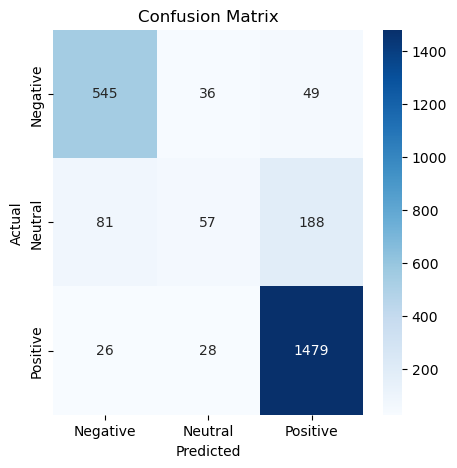

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model is your trained classifier
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Visualize confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'predictions' and 'Y_test' are defined

print("Accuracy:", round(accuracy_score(predictions, Y_test) * 100, 2))
print("Precision:", round(precision_score(predictions, Y_test, average="weighted") * 100, 2))
print("Recall:", round(recall_score(predictions, Y_test, average="weighted") * 100, 2))
print("F1 Score:", round(f1_score(predictions, Y_test, average="weighted") * 100, 2))

Accuracy: 83.61
Precision: 90.03
Recall: 83.61
F1 Score: 86.28


In [58]:
example1 = ["""the ambience was good, food was quite good. Had Saturday lunch, 
            which was cost-effective. Good place for a Saturday brunch.
           """]

result=model.predict(example1)
print(result)

['Positive']


In [59]:
example2=["we ordered corn cheese balls manchow soup and paneer shashlik sizzler the sizzler was stale paneer was smelling and the waiter was so impolite to even accept the mistake never going again"]
result=model.predict(example2)
print(result)

['Negative']


In [60]:
example3=["The food was good.Ambience was  poor."]
result=model.predict(example3)
print(result)

['Neutral']


In [61]:
! pip install xgboost


In [62]:
! pip install scikit-learn xgboost

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Assuming 'final' is your dataframe
X = final["Reviews"]
Y = final["Updated_Sentiment"]

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.25, random_state=42)

# Create and fit Logistic Regression pipeline
tvec = TfidfVectorizer()
clf_lr = LogisticRegression(solver="lbfgs", max_iter=1000)
pipeline_lr = Pipeline([("Vectorizer", tvec), ("Classifier", clf_lr)])
pipeline_lr.fit(X_train, Y_train)

# Create and fit Multinomial Naive Bayes pipeline
clf_nb = MultinomialNB()
pipeline_nb = Pipeline([("Vectorizer", tvec), ("Classifier", clf_nb)])
pipeline_nb.fit(X_train, Y_train)

# Create and fit Random Forest Classifier pipeline
clf_rf = RandomForestClassifier(random_state=42)
pipeline_rf = Pipeline([("Vectorizer", tvec), ("Classifier", clf_rf)])
pipeline_rf.fit(X_train, Y_train)

# Create and fit XGBoost pipeline
clf_xgb = XGBClassifier()
pipeline_xgb = Pipeline([("Vectorizer", tvec), ("Classifier", clf_xgb)])
pipeline_xgb.fit(X_train, Y_train)

# Predictions for each model
predictions_lr = pipeline_lr.predict(X_test)
predictions_nb = pipeline_nb.predict(X_test)
predictions_rf = pipeline_rf.predict(X_test)
predictions_xgb = pipeline_xgb.predict(X_test)

# Evaluate models
def evaluate_model(predictions, name="Model"):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions, average="weighted")
    recall = recall_score(Y_test, predictions, average="weighted")

    print(f"{name} Evaluation:")
    print("Accuracy:", round(accuracy * 100, 2))
    print("Precision:", round(precision * 100, 2))
    print("Recall:", round(recall * 100, 2))
    print("f1_score:", round(recall * 100, 2))
    print()

evaluate_model(predictions_lr, "Logistic Regression")
evaluate_model(predictions_nb, "Multinomial Naive Bayes")
evaluate_model(predictions_rf, "Random Forest Classifier")
evaluate_model(predictions_xgb, "XGBoost")


Logistic Regression Evaluation:
Accuracy: 83.61
Precision: 80.41
Recall: 83.61
f1_score: 83.61

Multinomial Naive Bayes Evaluation:
Accuracy: 70.43
Precision: 65.03
Recall: 70.43
f1_score: 70.43

Random Forest Classifier Evaluation:
Accuracy: 81.16
Precision: 76.75
Recall: 81.16
f1_score: 81.16

XGBoost Evaluation:
Accuracy: 83.33
Precision: 80.92
Recall: 83.33
f1_score: 83.33



C:\Users\SriramM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
example1 = ["""the ambience was good, food was quite good. Had Saturday lunch, 
            which was cost-effective. Good place for a Saturday brunch.
           """]

result=pipeline_lr.predict(example1)
print(result)

[2]


In [65]:
example2=["we ordered corn cheese balls manchow soup and paneer shashlik sizzler the sizzler was stale paneer was smelling and the waiter was so impolite to even accept the mistake never going again"]
result=pipeline_lr.predict(example2)
print(result)

[0]


In [66]:
example7=["The food was good.Ambience was poor."]
result=pipeline_lr.predict(example7)
print(result)

[1]


In [67]:
example7=["The food was good.Ambience was poor."]
result=pipeline_nb.predict(example7)
print(result)

[2]


In [68]:
example7=["The food was good.Ambience was  poor."]
result=pipeline_rf.predict(example7)
print(result)

[2]


In [70]:
example7=["The food was good.Ambience was  poor."]
result=pipeline_xgb.predict(example7)
print(result)

[2]


In [75]:
example7=["Food is bad"]
result=pipeline_xgb.predict(example7)
print(result)

[0]
